Code written by Cindy Liu(1) and Dr. Martin Ross(2) <br>
(1) Coop student, Physics & Astronomy <br>
(2) Associate Professor, Earth and Environmental Sciences
University of Waterloo, Canada

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

In [2]:
# loading data
#The default structure is samples (rows) and weigth frequencies (cols) from coarse (left) to fine (right)
#Rename file and adjust the skiprows and column range as needed

allFreq = np.loadtxt("2021data.txt", skiprows=2, 
                     usecols=np.arange(1,10)).transpose()

grainSizesData = np.loadtxt('2021data.txt', skiprows = 1,
                            usecols=np.arange(0, 9), dtype='str')[0]

# grain size labels
grainSizes = []

for i in grainSizesData[:-1]:
    grainSizes.append(i)
grainSizes.append('<0.063')

# sample labels
allLabels = np.loadtxt("2021data.txt", skiprows=2, usecols=0, dtype='str')

In [3]:
allLabels.shape

(41,)

In [4]:
# function for cumulative curve values
def cumulative(allSamples, start, end):
    
    # inputs: (list of lists, int, int)
    
    sampleCumulative = [[]] * (end-start)
    
    for i in range(start,end):
        sampleCumulative[i-start] = allSamples[:,i]
        sampleCumulative[i-start] = np.cumsum(sampleCumulative[i-start])
        
    return sampleCumulative

# function for cumulative curves
def cumulativeCurve(allSamples, start, end, xSize, ySize):
    
    # inputs: (list of lists, int, int, int, int)
    
    cumulativeVals = cumulative (allSamples, start, end)
    
    for i in range(len(cumulativeVals)):
        if (i % 2) == 0:
            colour = '#465775'
        else:
            colour = '#ef6f6c'
        fig, ax = plt.subplots(1,1, figsize=(xSize, ySize))
        plt.plot(range(len(grainSizes)), cumulativeVals[i], 
                 color=colour, linewidth=2.5, marker='o')
        plt.xticks(np.arange(0,(len(phiVals))), labels=phiVals, fontsize=14)
        plt.ylim((-0.5, 105))
        ax.set_xlabel('phi', fontsize=14)
        ax.set_ylabel('Cumulative wt. Frequency %', fontsize=14)
        ax.tick_params(axis='y', labelsize=14)
        ax.set_title('Cumulative wt. Frequency of Sample '+ str(allLabels[start+i]), 
                     pad=20, fontsize=18)
        plt.show()

In [5]:
# calculating phi values
grainSizesFloat = []

for i in grainSizes[:-1]:
    grainSizesFloat.append(float(i))

phiVals = []

for i in grainSizesFloat:
    phi = -float(round(math.log(i,2)))
    if phi == -0.0:
        phi = 0.0
    phiVals.append(phi)
phiVals.append(4.5)

print(phiVals)

[-3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 4.5]


In [6]:
# functions for verbal representations of skew and standard deviation
def verbalSkew(skewVal):
    if skewVal > 0.3:
        skewText = "Strongly fine-skewed"
    elif skewVal >= 0.1:
        skewText = "Fine skewed" 
    elif skewVal >= -0.1:
        skewText = "Near symmetrical"
    elif skewVal >=-0.3:
        skewText = "Coarse skewed"
    else:
        skewText = "Strongly coarse skewed"
    return skewText

def verbalStdev(stdev):
    if stdev >4.00:
        stdevText = "Extremely poorly sorted"
    elif stdev >=2.0:
        stdevText = "Very poorly sorted"
    elif stdev >=1.00:
        stdevText = "Poorly sorted"
    elif stdev >=0.71:
        stdevText = "Moderately sorted"
    elif stdev >=0.50:
        stdevText = "Moderately well sorted"
    elif stdev >=0.35:
        stdevText = "Well sorted"
    else:
        stdevText = "Very well sorted"  
    return stdevText

In [7]:
# function for skewness, mean, and stdev
def skewMeanStdev(cumulativeVals):
    
    # inputs: (list)
    
    skews = []
    means = []
    stdevs = []
    
    for i in range(len(cumulativeVals)):
        phi5p = np.interp(5, cumulativeVals[i], phiVals).round(2)
        phi16p = np.interp(16, cumulativeVals[i], phiVals).round(2)
        phi50p = np.interp(50, cumulativeVals[i], phiVals).round(2)
        phi84p = np.interp(84, cumulativeVals[i], phiVals).round(2)
        phi95p = np.interp(95, cumulativeVals[i], phiVals).round(2)
        
        skew = ((phi84p+phi16p-(2*phi50p))/(2*(phi84p-phi16p)))
        + ((phi95p+phi5p-(2*phi50p))/(2*(phi95p-phi5p)))
        mean = (phi16p+phi50p+phi84p)/3
        stdev = ((phi84p-phi16p)/4) + ((phi95p-phi5p)/6.6)
        
        skews.append(skew)
        means.append(mean)
        stdevs.append(stdev)
        
    return [skews, means, stdevs]  

In [8]:
# call the cumulative function to get cumulative values
my_cumulative_vals = cumulative(allFreq, 0, 41)

# call the skewMeanStdev function to obtain skewness, mean, and stdev
skewness, mean, stdev = skewMeanStdev(my_cumulative_vals)

# print the outputs
print("Skewness:", skewness)
print("Mean:", mean)
print("Standard Deviation:", stdev)

Skewness: [-0.3, -0.413265306122449, -0.2350835322195705, -0.08724832214765105, -0.3897959183673471, -0.4078947368421052, -0.41558441558441567, -0.08057395143487858, -0.40181818181818163, -0.18452380952380956, -0.06438356164383557, -0.38767123287671246, -0.4002624671916011, -0.2281323877068558, -0.032687651331719074, -0.11616161616161604, 0.009090909090909012, -0.05145118733509243, -0.27577319587628857, -0.1611764705882353, -0.29345603271983645, -0.3553921568627451, -0.0555555555555556, -0.42507204610951016, 0.061162079510703356, -0.4256410256410256, -0.2817371937639198, 0.16561514195583601, -0.0605536332179931, -0.30968858131487886, -0.14141414141414144, 0.05787476280834912, -0.18146718146718147, 0.06453900709219859, -0.18141592920353988, -0.31057268722466974, -0.0433715220949263, 0.02955665024630545, -0.07457212713936423, -0.1496674057649668, -0.42009685230024213]
Mean: [3.7900000000000005, 2.92, 2.5433333333333334, 1.4133333333333333, 3.473333333333333, 3.263333333333333, 3.25666666

In [9]:
# define the input variables
allSamples = allFreq
start = 0
end = 41

# call the cumulative and skewMeanStdev functions to obtain the outputs
my_cumulative_vals = cumulative(allSamples, start, end)
skewness, mean, stdevs = skewMeanStdev(my_cumulative_vals)


# create a dataframe from the output
df = pd.DataFrame({'Sample ID': allLabels, 'Mean': mean, 'Skewness': skewness, 'Stdev': stdev})

# print the dataframe
print(df)


    Sample ID      Mean  Skewness     Stdev
0   21PXN011B  3.790000 -0.300000  0.717045
1   21PXN012B  2.920000 -0.413265  1.876970
2   21PXN013B  2.543333 -0.235084  2.015682
3   21PXN014B  1.413333 -0.087248  2.602121
4   21PXN015B  3.473333 -0.389796  1.183712
5   21PXN016B  3.263333 -0.407895  1.528182
6   21PXN017B  3.256667 -0.415584  1.521515
7   21PXN018B -0.363333 -0.080574  1.996136
8   21PXN019B  3.363333 -0.401818  1.411742
9   21PXN020B  1.163333 -0.184524  1.171515
10  21PXN021B  2.533333 -0.064384  1.797348
11  21PXN022B  2.986667 -0.387671  1.871591
12  21PXN023B  2.943333 -0.400262  1.896439
13  21PXN024B  0.106667 -0.228132  2.021136
14  21PXN033B  2.210000 -0.032688  2.080985
15  21PXN034B  2.453333 -0.116162  1.967273
16  21PXN035B  2.263333  0.009091  1.897348
17  21PXN036B  2.390000 -0.051451  1.961136
18  21PXN037B  2.736667 -0.275773  1.973030
19  21PXN038B  2.393333 -0.161176  2.188258
20  21PXN039B  2.343333 -0.293456  2.339167
21  21PXN040B  2.773333 -0.35539

In [10]:
def createDataFrame(allSamples, allLabels, start, end):
    cumulativeVals = cumulative(allSamples, start, end)
    statsVals = skewMeanStdev(cumulativeVals)
    skews = statsVals[0]
    means = statsVals[1]
    stdevs = statsVals[2]

    df = pd.DataFrame({'Sample ID': allLabels[start:end], 
                       'Mean': means, 
                       'Skewness': skews, 
                       'Standard Deviation': stdevs})
    
    # add verbal skewness and standard deviation columns
    df['Verbal Skewness'] = df['Skewness'].apply(verbalSkew)
    df['Verbal Stdev'] = df['Standard Deviation'].apply(verbalStdev)
    
    return df

In [11]:
createDataFrame(allFreq,allLabels, 0, 41)

,Sample ID,Mean,Skewness,Standard Deviation,Verbal Skewness,Verbal Stdev
0,21PXN011B,3.790000,-0.300000,0.717045,Coarse skewed,Moderately sorted
1,21PXN012B,2.920000,-0.413265,1.876970,Strongly coarse skewed,Poorly sorted
2,21PXN013B,2.543333,-0.235084,2.015682,Coarse skewed,Very poorly sorted
3,21PXN014B,1.413333,-0.087248,2.602121,Near symmetrical,Very poorly sorted
4,21PXN015B,3.473333,-0.389796,1.183712,Strongly coarse skewed,Poorly sorted
5,21PXN016B,3.263333,-0.407895,1.528182,Strongly coarse skewed,Poorly sorted
6,21PXN017B,3.256667,-0.415584,1.521515,Strongly coarse skewed,Poorly sorted
7,21PXN018B,-0.363333,-0.080574,1.996136,Near symmetrical,Poorly sorted
8,21PXN019B,3.363333,-0.401818,1.411742,Strongly coarse skewed,Poorly sorted
9,21PXN020B,1.163333,-0.184524,1.171515,Coarse skewed,Poorly sorted


In [12]:
# function to generate weight frequency distribution graphs 
def wtHist(allSamples, start, end, xSize, ySize):
    
    '''
    inputs: (list of lists, int, int, list of 
            lists, int, int)
            
    start>end
    '''
    adjust = start
    if start > 5:
        adjust -= 1
    
    specifiedSamples = [[]] * (end-start)
    for i in range(start,end):
        specifiedSamples[i-start] = allSamples[:,i]
    
    sampleCount = start
    
    for i in specifiedSamples:
        if (sampleCount % 2) == 0:
            colour = '#4464ad'
        else:
            colour = '#a4b0f5'
        fig, ax = plt.subplots(1,1,figsize=(xSize,ySize))
        ax.bar(np.arange(len(i)), i, color=colour, alpha=0.8)
        ax.plot(np.arange(len(i)), i, color='#f58f29', 
                marker='o', linewidth=0)
        plt.xticks(np.arange(0,len(grainSizes))+0.5, labels=grainSizes)
        ax.set_xlabel('Grain Size (mm)', fontsize=14)
        ax.set_ylabel('Frequency (wt. %)', fontsize=14)
        ax.tick_params(axis='y', labelsize=14)
        ax.set_title('Weight Frequency Distribution of Sample '
                     + str(allLabels[sampleCount]), pad=20, fontsize=18)
        plt.show()
        sampleCount+=1

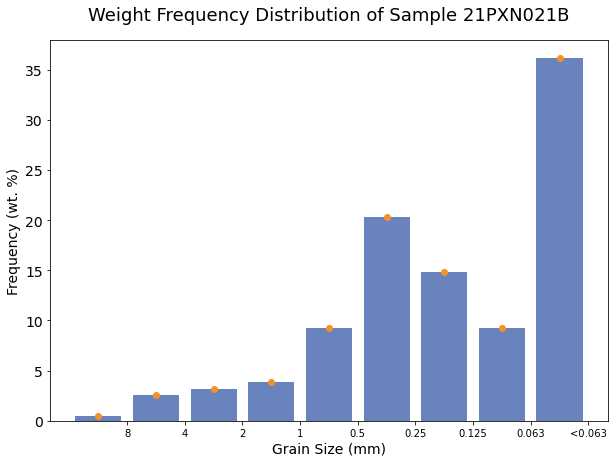

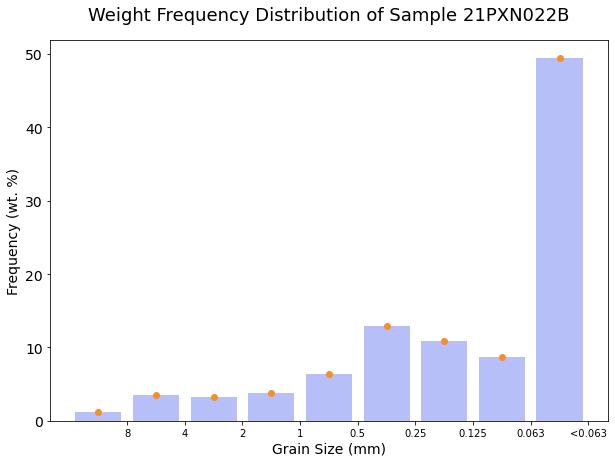

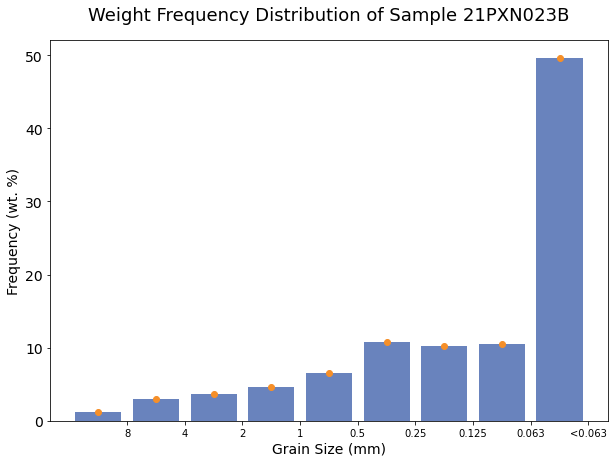

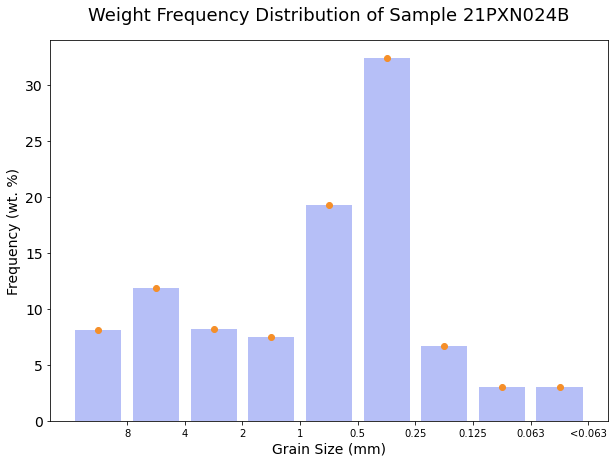

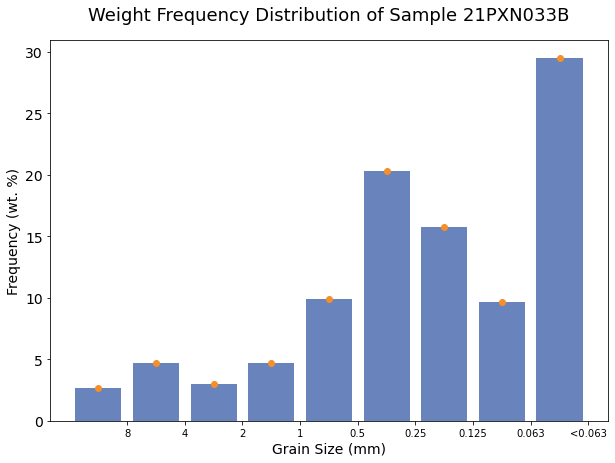

In [13]:
# weight frequency distribution of samples 1-5
wtHist(allFreq,10,15, 10,7)


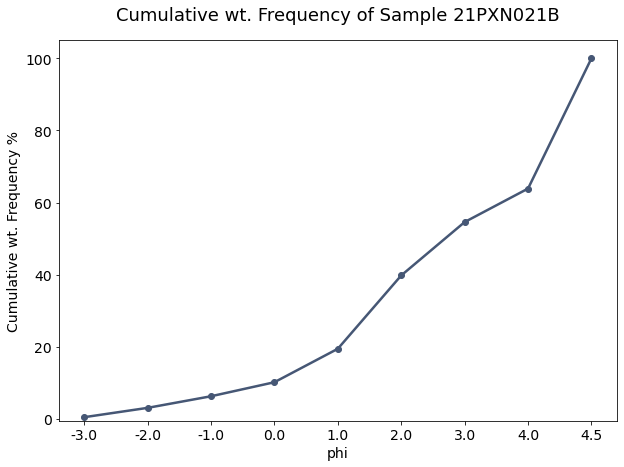

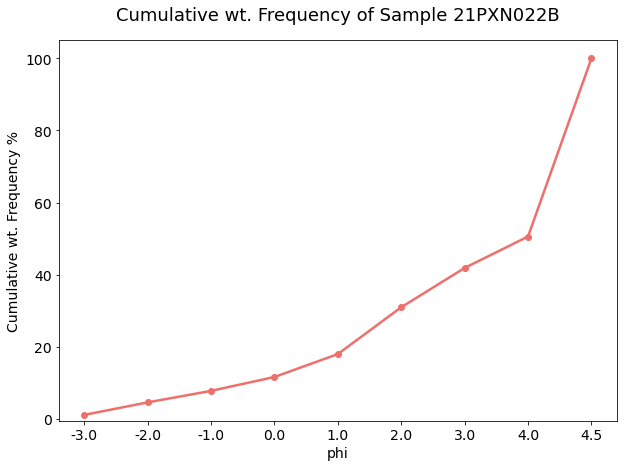

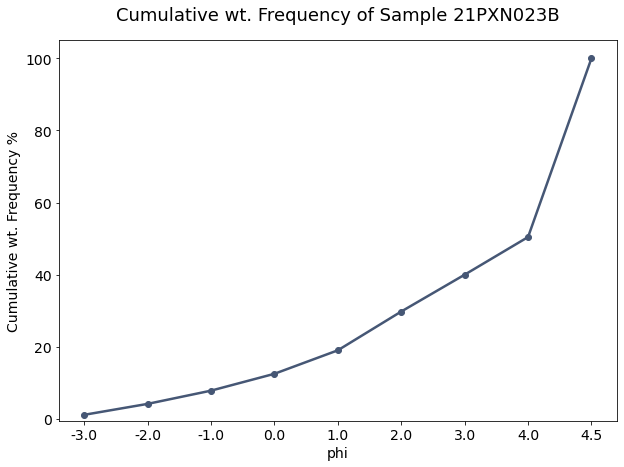

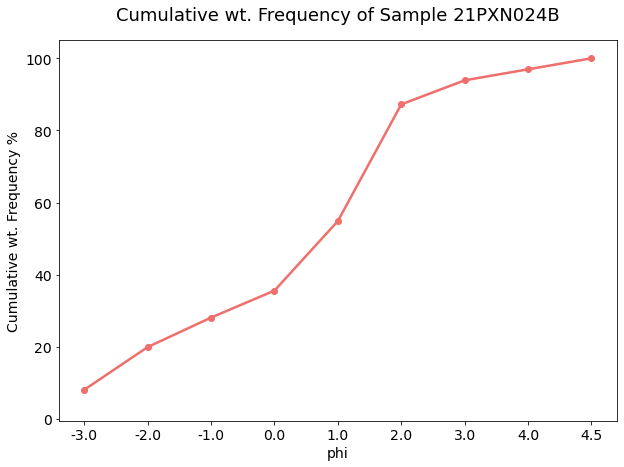

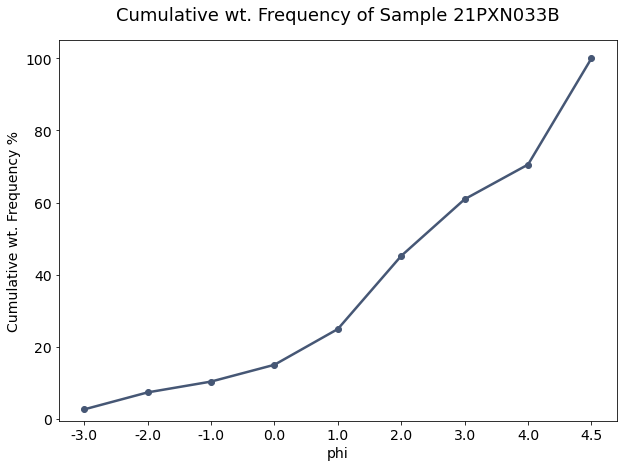

In [14]:
# Call the function to create the figures and save each figure to the PDF file
cumulativeCurve(allFreq, 10, 15, 10, 7) #cumulative curves of grain sizes in samples 1-5